## Demo of changing face on Misty II via rerobots API

This is free software, released under the Apache License, Version 2.0.
You may obtain a copy of the License at https://www.apache.org/licenses/LICENSE-2.0

To learn more about our services, go to https://docs.rerobots.net/

Copyright (c) 2019 rerobots, Inc.

In [1]:
API_TOKEN = ''  # GET YOUR TOKEN FROM https://rerobots.net/tokens

In [ ]:
!pip install rerobots
!pip install paramiko
!pip install requests

In [1]:
import time
import matplotlib.pyplot as plt
%matplotlib inline
from rerobots.api import Instance


## Read more about this workspace type at
## https://docs.rerobots.net/workspaces/fixed_misty2
instance = Instance(['fixed_misty2'], api_token=API_TOKEN)

In [1]:
## Wait for instance to finish initializing

while True:
    if instance.get_status() == 'READY':
        break
    time.sleep(2)

In [1]:
instance.get_details()

{'type': 'fixed_misty2',
 'region': 'us:cali',
 'starttime': '2020-08-22 00:15:42.010702',
 'status': 'READY',
 'conn': {'type': 'sshtun',
  'ipv4': '147.75.70.51',
  'port': 2212,
  'hostkeys': ['ecdsa-sha2-nistp256 AAAAE2VjZHNhLXNoYTItbmlzdHAyNTYAAAAIbmlzdHAyNTYAAABBBFxmSECkpYRDgmV81cdNO/4Gt+i+uM4JWR5gKTYVuuHXTap1bGK1WuGwwkDrAQ7I2JF7j8xQcOYtIBUTaiaYGX4= root@newc859']}}

In [1]:
## Start the "cam" add-on, which supports video streaming

while True:
    payload = instance.status_addon_cam()
    if payload['status'] == 'active':
        break
    elif payload['status'] == 'notfound':
        instance.activate_addon_cam()
    time.sleep(2)


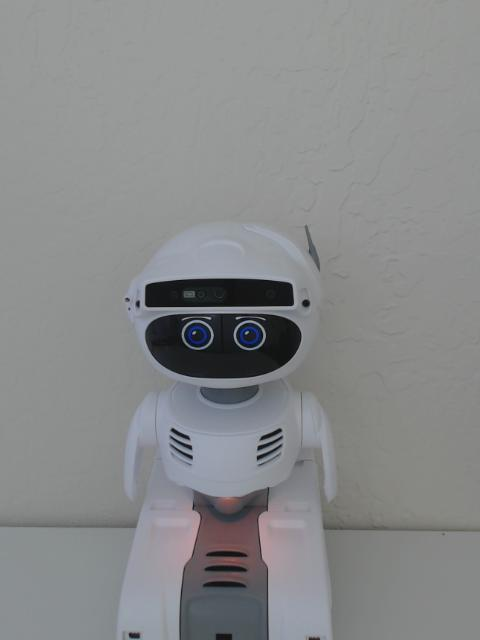

In [1]:
## Display the Misty II robot as it is now.
## The image is displayed as an HTML <img> element
## in this Jupyter Notebook.
from IPython.display import display, HTML

payload = instance.get_snapshot_cam(coding='base64', dformat='jpeg')

if not payload['success']:
    time.sleep(1)
    payload = instance.get_snapshot_cam(coding='base64', dformat='jpeg')
    assert payload['success']

display(HTML('<img src="data:image/jpeg;base64,{}">'.format(payload['data'])))

In [1]:
instance.activate_addon_mistyproxy()

In [1]:
while True:
    mproxy = instance.status_addon_mistyproxy()
    if mproxy['status'] == 'active':
        break
    time.sleep(2)
BASEURL = mproxy['url'][1]

In [1]:
## Change facial expression
## https://docs.mistyrobotics.com/misty-ii/web-api/api-reference/#displayimage
import requests
res = requests.post(BASEURL + '/api/images/display', json={'FileName': 'e_Admiration.jpg'})
assert res.ok
time.sleep(1)  # time for action to finish...


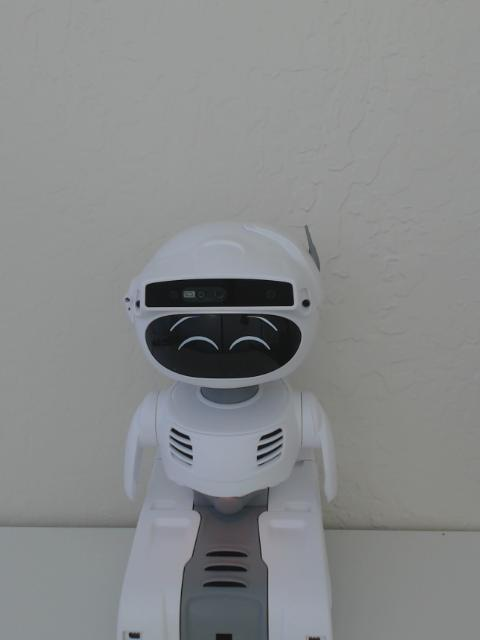

In [1]:
## Display the Misty II robot as it is now
## The image is displayed as an HTML <img> element
## in this Jupyter Notebook.
from IPython.display import display, HTML

payload = instance.get_snapshot_cam(coding='base64', dformat='jpeg')
display(HTML('<img src="data:image/jpeg;base64,{}">'.format(payload['data'])))

In [1]:
## Tilt head down
## https://docs.mistyrobotics.com/misty-ii/web-api/api-reference/#movehead
res = requests.post(BASEURL + '/api/head', json={
    'Pitch': 30,
    'Roll': 0,
    'Yaw': 0,
    'Velocity': 80,
    'Units': 'degrees',
})
assert res.ok
time.sleep(3)  # time for action to finish...

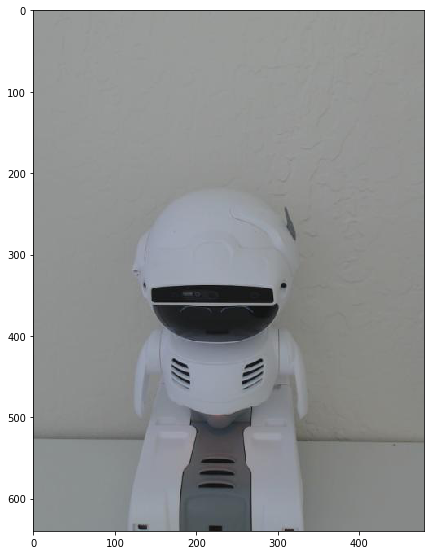

In [1]:
## Display the Misty II robot as it is now
## The image is represented as type NumPy ndarray and
## displayed by Matplotlib.

payload = instance.get_snapshot_cam(dformat='ndarray')
fig = plt.figure(figsize=(7,12))
plt.imshow(payload['data'])

In [1]:
# Done!

instance.terminate()